<a href="https://colab.research.google.com/github/JoshuaChung93/Cryptocurrency-trading-bot/blob/main/BTC_IBS_strategy_backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BTC historical dataset/BTC-Hourly.csv', index_col=0)
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
unix,,,,,,,,
1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [4]:
df.tail()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
unix,,,,,,,,
1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69
1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93


In [5]:
# 시계열에 맞게 인덱스를 거꾸로 돌려줍니다
df = df.loc[::-1].reset_index(drop=True)
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93
1,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
2,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
3,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
4,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69


In [6]:
# 인덱스 이름 설정
df.index.name = 'Bar numbers'
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
Bar numbers,,,,,,,,
0,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93
1,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
2,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
3,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
4,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69


In [7]:
# 필요 없는 열 드랍하기
df.drop(['Volume BTC','Volume USD'], axis=1, inplace=True)
df.tail()

,date,symbol,open,high,low,close
Bar numbers,,,,,,
33254,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97
33255,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53
33256,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32
33257,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98
33258,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27


## 백테스트 기간 주가 그래프

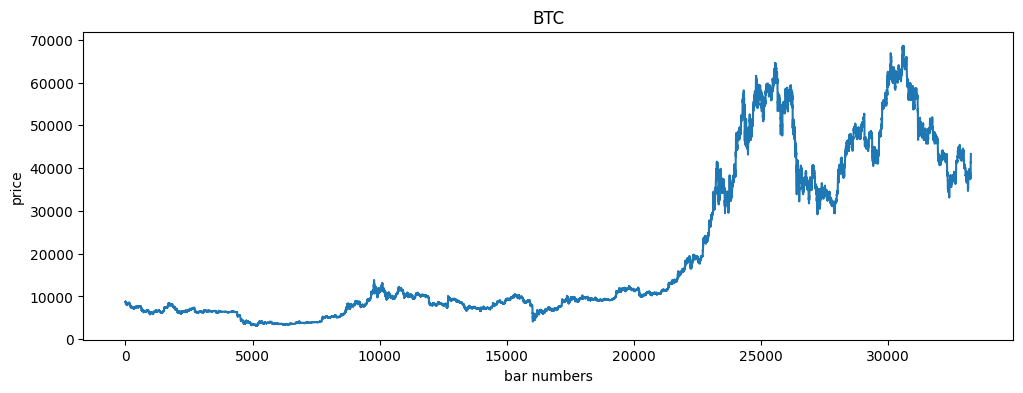

In [8]:
plt.style.use(['default'])
df['close'].plot(figsize=(12,4), title='BTC')
plt.xlabel('bar numbers')
plt.ylabel('price')

plt.show()

In [9]:
# 100SMA, 200SMA 칼럼 생성
df['200SMA'] = df['close'].rolling(4800).mean()
df['100SMA'] = df['close'].rolling(2400).mean()
df.head()

,date,symbol,open,high,low,close,200SMA,100SMA
Bar numbers,,,,,,,,
0,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,NaN,NaN
1,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,NaN,NaN
2,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,NaN,NaN
3,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,NaN,NaN
4,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,NaN,NaN


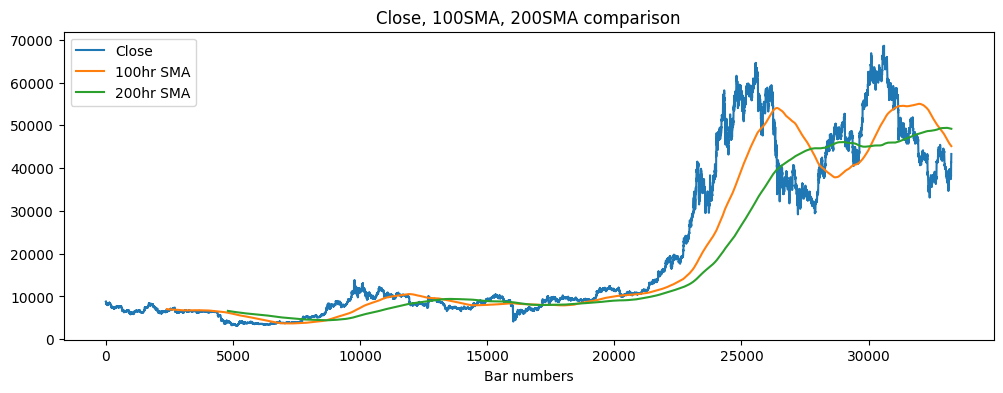

In [10]:
df['close'].plot(figsize=(12,4), label='Close')
df['100SMA'].plot(label='100hr SMA')
df['200SMA'].plot(label='200hr SMA')

plt.title('Close, 100SMA, 200SMA comparison')
plt.legend()


In [11]:
# 진입조건을 위한 칼럼 생성
df['long'] = (df['close'] - df['low'])/(df['high'] - df['low']) < 0.2
df['short'] = (df['close'] - df['low'])/(df['high'] - df['low']) > 0.8
df['long_con'] = (df['close']) <= (1.05*df['100SMA'])
df['short_con'] = (df['close']) >= (0.95*df['100SMA'])

In [22]:
# 백테스트 초기화 담당하는 함수 구현
def initialize(context):
  context.i = 0

In [23]:
# 거래일마다 호출되는 함수 구현
def handle_data(context,df):
  context.i += 1
  if context.i < 2400:
    return

In [12]:
df.loc[df['long']&df['long_con']]

,date,symbol,open,high,low,close,200SMA,100SMA,long,short,long_con,short_con
Bar numbers,,,,,,,,,,,,
2408,2018-08-23 14:00:00,BTC/USD,6426.14,6495.00,6426.14,6439.74,NaN,7021.826508,True,False,True,False
2411,2018-08-23 17:00:00,BTC/USD,6452.99,6480.00,6446.64,6446.66,NaN,7019.216575,True,False,True,False
2420,2018-08-24 02:00:00,BTC/USD,6498.31,6519.83,6494.31,6499.15,NaN,7011.855821,True,False,True,False
2429,2018-08-24 11:00:00,BTC/USD,6540.00,6570.00,6532.81,6537.99,NaN,7005.357658,True,False,True,False
2445,2018-08-25 03:00:00,BTC/USD,6757.67,6786.01,6720.54,6724.14,NaN,6994.211308,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
33211,2022-02-27 01:00:00,BTC/USD,38813.10,38880.04,38233.95,38233.95,49267.380637,45513.417850,True,False,True,False
33224,2022-02-27 14:00:00,BTC/USD,39100.84,39204.81,38695.24,38779.41,49248.286602,45417.091533,True,False,True,False
33229,2022-02-27 19:00:00,BTC/USD,38896.58,38982.43,37538.96,37644.68,49240.349923,45376.973333,True,False,True,False


8252.56

In [ ]:
for index, row in df.iterrows():

    # (첫날+100)이전은 계산을 할 수 없으므로 제외
    if index < 100:
        continue
        
    # condition to define 80/20 candle pattern and market timing
    long = (row['close'] - row['low'])/(row['high'] - row['low']) < 0.2
    short = (row['close'] - row['low'])/(row['high'] - row['low']) > 0.8
    long_con = (row['close']) <= 1.05*(row['100SMA'])
    short_con = (row['close']) >= 0.95*(row['100SMA'])
    
    if (long & long_con):
        entry_price = row['close']
        exit_prcie = row.loc[short,'close']
        rt = ((exit_price - entry_price)/entry_price - 1)/100
        
        print(f'{df.index} entry price {entry_price} exit price {exit_price} long_return {rt}%')

    elif (short & short_con):
        entry_prcie2 = row['close']
        exit_price2 = row.loc[long,'close']
        rt2 = ((exit_prie2 - entry_prcie)/entry_price -1)/100
        
        print(f'{df.index} entry price2 {entry_price2} exit price2 {exit_price2} shorot_return {rt2}%')


IndexingError: Too many indexers

In [ ]:
# Solution: creating entry signal column

long = (row['close'] - row['low'])/(row['high'] - row['low']) < 0.2
short = (row['close'] - row['low'])/(row['high'] - row['low']) > 0.8
long_con = (row['close']) <= 1.05*(row['100SMA'])
short_con = (row['close']) >= 0.95*(row['100SMA'])
